In [1]:
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
data = io.loadmat('../data/allFaces.mat')
faces = data['faces']
m = int(data['m'])
n = int(data['n'])
nfaces = data['nfaces'].flatten()

C:\Users\danie\AppData\Local\Temp\ipykernel_5808\3803307669.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(data['m'])
C:\Users\danie\AppData\Local\Temp\ipykernel_5808\3803307669.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(data['n'])


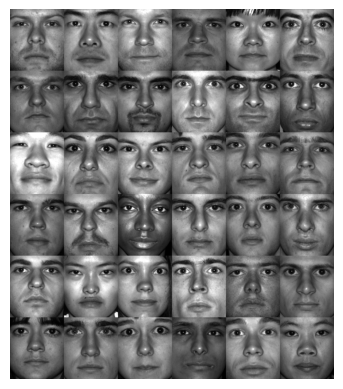

In [3]:
allPersons = np.zeros((n* 6, m * 6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1

img = plt.imshow(allPersons, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1)

In [5]:
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T

In [6]:
U, S, VT = np.linalg.svd(X, full_matrices=False)

In [7]:
X.shape[1] + 64 * 2

2410

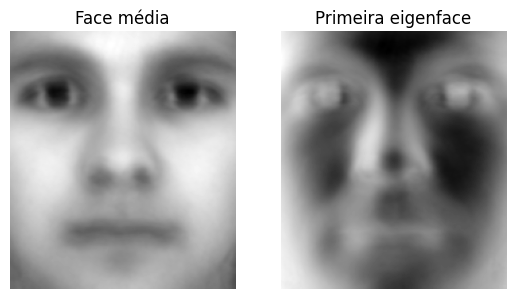

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T, cmap='gray')
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T, cmap='gray')
ax1.axis('off')
ax2.axis('off')
# titulos
ax1.set_title('Face média')
ax2.set_title('Primeira eigenface') # autovalor reshaped
plt.show()

0
1
2
3
4


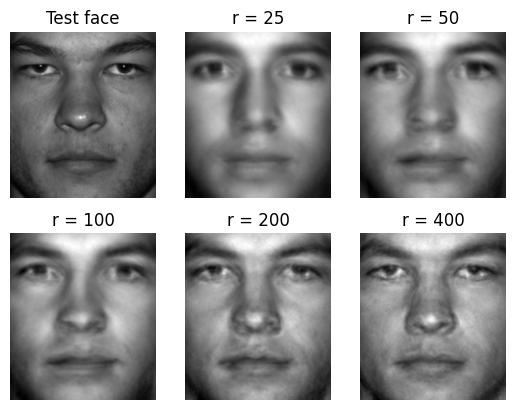

In [9]:
testFace = faces[:,np.sum(nfaces[:36])]
testFaceMS = testFace - avgFace
r_list = [25, 50, 100, 200, 400]
# create 2x4 grid
fig, axs = plt.subplots(2, 3)

# plot test face
axs[0, 0].imshow(np.reshape(testFace,(m,n)).T, cmap='gray')
axs[0, 0].set_title('Test face')
axs[0, 0].axis('off')

for i, ax in enumerate(axs.flat[1:]):
    print(i)
    r = r_list[i]
    reconFace = avgFace + U[:,:r] @ U[:,:r].T @ testFaceMS
    faceshow = np.reshape(reconFace,(m,n)).T
    ax.imshow(faceshow, cmap='gray')
    ax.set_title('r = ' + str(r))
    ax.axis('off')
plt.show()

(168, 192)


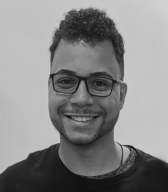

In [10]:
im = Image.open('../data/becelli.png').convert('L')
# resize 1/6
im = im.resize((168, 192))
print(im.size)
im

25
50
100
200
400


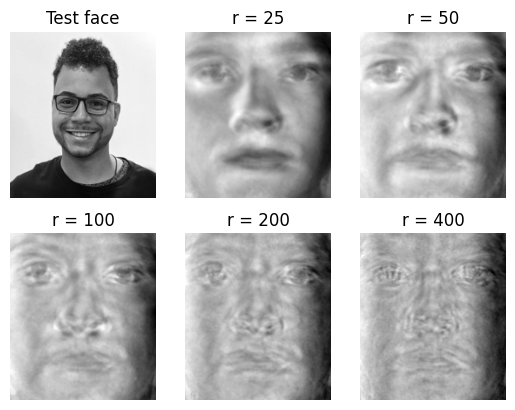

In [11]:
test_im = np.array(im).flatten()
test_im_ms = test_im - avgFace

r_list = [25, 50, 100, 200, 400]
# create 2x4 grid
fig, axs = plt.subplots(2, 3)

# plot test face
axs[0, 0].imshow(np.reshape(test_im,(n,m)), cmap='gray')
axs[0, 0].set_title('Test face')
axs[0, 0].axis('off')

for i, ax in enumerate(axs.flat[1:]):
    r = r_list[i]
    print(r)
    reconFace = avgFace + U[:,:r] @ U[:,:r].T @ test_im_ms
    faceshow = np.reshape(reconFace,(m,n)).T
    ax.imshow(faceshow, cmap='gray')
    ax.set_title('r = ' + str(r))
    ax.axis('off')
plt.show()